## Время исследований

![](https://2.bp.blogspot.com/-VOT5x12UqPY/WSh53tQ94HI/AAAAAAAAAMY/-nlcz28_Fj4UzJjbn4bBINKCnzwag1W4QCLcB/s1600/my-pic-widget.jpg)

На сайте https://www.kaggle.com/ выберите любой набор данных в формате CSV и проведите для него маленькое исследование: загрузите данные из набора с использованием стандартного модуля `csv`, посмотрите средние значения и стандартные отклонения двух выбранных числовых атрибутов, найдите [методом наименьших квадратов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2) уравнение линейной зависимости, связывающей один числовой атрибут с другим. Для оценки заданной зависимости найдите [коэффициент парной корреляции](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F), сделайте соответствующие выводы.

**Результаты надо обязательно прокомментировать и пояснить!**

---

**Пример 1:**

Пусть таблица `bikes.csv` содержит данные по арендам велосипедов за $2$ года:
- `datetime`: дата и время аренды
- `season`: время года
- `temp`: температура воздуха по Цельсию
- `windspeed`: скорость ветра 
- `registered`: число аренд

Одно из направлений исследования могло бы заключаться в проверке зависимости суммарного числа аренд от температуры воздуха.

*в такой ячейке (режим Markdown) можно писать текст*

# San Francisco Airport Runway Use 01L/R gade

Среднее кол-во/год уехавших заграницу людей: 870.1818181818181
Средний % людей/год уехавших заграницу: 22.507272727272724
Стандартное отклонение в кол-ве людей: 452.00349958419974
Стандартное отклонение в % людей: 11.503561266763514
Уравнение линейной зависимости: y = -0.001017899035311498x + 270.0857476707372


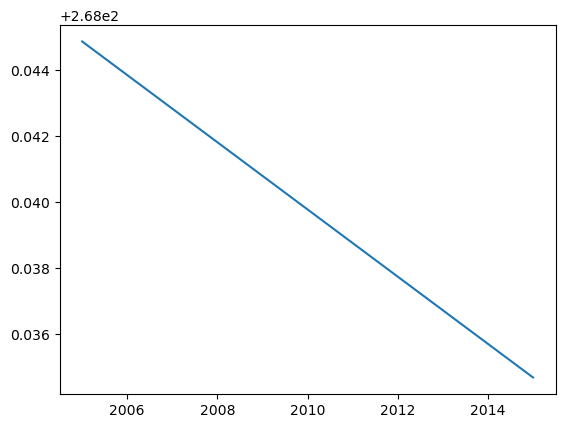

In [11]:
import csv
from matplotlib import pylab as plt
import statistics
%matplotlib inline


def ShortFloat(a, digits=0):
    return f"{a:.{digits}f}"


year = []
count_people = []
perc_people = []
temp_y = 0
cp = 0
pp = 0

with open('late-night-preferential-runway-use-1.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for k in reader:
        if k[1] != "N/A":
            if int(k[1]) != temp_y:
                year.append(int(k[1]))
                temp_y = int(k[1])
                count_people.append(cp)
                pp = pp / 12
                pp = float(ShortFloat(pp, 2))
                perc_people.append(pp)
                cp = 0
                pp = 0
            else:
                cp += int(k[3])
                r = k[4].find('%')
                temp_pp = ""
                temp_pp = str(k[4])
                temp_pp = temp_pp[:r]
                pp += int(temp_pp)

aver_cpeop = 0
for peoples in count_people:
    aver_cpeop += peoples   
aver_cpeop = aver_cpeop / len(count_people)
print(f'Среднее кол-во/год уехавших заграницу людей: {aver_cpeop}')

aver_ppeop = 0
for percents in perc_people:
    aver_ppeop += percents
aver_ppeop = aver_ppeop / len(perc_people)
print(f'Средний % людей/год уехавших заграницу: {aver_ppeop}')

stocp = statistics.stdev(count_people)
stopp = statistics.stdev(perc_people)
print(f'Стандартное отклонение в кол-ве людей: {stocp}')
print(f'Стандартное отклонение в % людей: {stopp}')

s_year = sum(year)
s_pp = sum(perc_people)
sqy = 0
yearpp = 0
for i, item in enumerate(year):
    sqy += s_year ** 2
    yearpp += year[i] * perc_people[i]  
a = (s_pp * s_year - yearpp) /  (s_year ** 2 - sqy)
b = (yearpp - sqy * a) / s_year
print(f"Уравнение линейной зависимости: y = {a}x + {b}")

y = []
for elem in year:
    y.append(a * elem + b)

plt.plot(year, y)